In [210]:
#Exemplo 2 - Classificar se uma pessoa compra ou não o produto com base na idade, renda e sexo

In [211]:
import pandas as pd

In [212]:
df = pd.read_csv('dadosspam.csv')

In [213]:
df.head()

,frequencia_palavras,presenca_links,num_anexos,comprimento_email,spam
0,6,0,1,793,0
1,3,0,1,698,0
2,7,1,1,455,1
3,4,1,1,810,0
4,6,0,3,620,1


Separar os Dados

In [214]:
x= df.drop('spam',axis=1) #Exclui a coluna spam e armazena as outra colunas em axis =1 - porque eu quero excluir a coluna spam
#x

In [215]:
y=df['spam'] #armazena em y a coluna Spam

Importando a biblioteca para dividir os dados em treino e teste

In [216]:
from sklearn.model_selection import train_test_split


In [217]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,
                                                random_state=42)

In [218]:
#importa as bibliotecas para machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,classification_report

Criando o modelo SVM

In [219]:
model = SVC(kernel='linear')
model.fit(x_train,y_train) #treina o modelo

SVC(kernel='linear')

Fazendo as predições

In [220]:
y_prev = model.predict(x_test)

In [221]:
y_prev #exibe as predições

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], d

In [222]:
#Analisando as métricas do modelo
acc = accuracy_score(y_test,y_prev)
acc

0.9866666666666667

In [223]:
#Matriz de confusao
cm = confusion_matrix(y_test,y_prev)
cm

array([[149,   0],
       [  4, 147]], dtype=int64)

In [224]:
#Metricas precisão 
prec = precision_score(y_test,y_prev)
prec

1.0

In [225]:
#metrica F1
f1= f1_score(y_test,y_prev)
f1

0.9865771812080537

In [226]:
#classidication report
relatorio = classification_report(y_test,y_prev,target_names=['Não Spam','Spam'])
print(relatorio)

              precision    recall  f1-score   support

    Não Spam       0.97      1.00      0.99       149
        Spam       1.00      0.97      0.99       151

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [227]:
df.shape # mostra a dimensão da base de dados

(1000, 5)

In [228]:
#montando a matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt 

Matriz de confusão

Text(50.722222222222214, 0.5, 'Real')

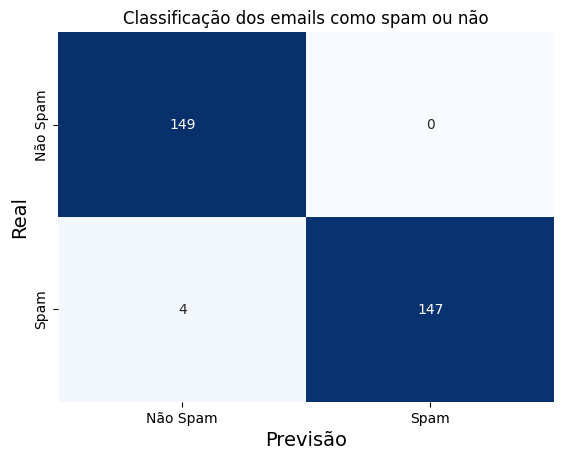

In [229]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Não Spam','Spam'],
            yticklabels=['Não Spam','Spam'])
plt.title('Classificação dos emails como spam ou não')
plt.xlabel('Previsão',fontsize=14)
plt.ylabel('Real',fontsize=14)

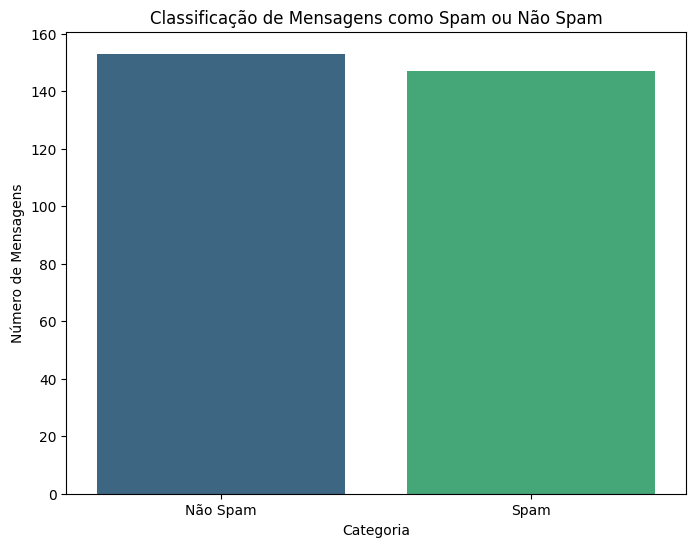

147
153


In [230]:
# Contagem das predições
spam_count = sum(y_prev)
non_spam_count = len(y_prev) - spam_count

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Não Spam', 'Spam'], y=[non_spam_count, spam_count], palette='viridis') # palete cor do heat map
plt.xlabel('Categoria')
plt.ylabel('Número de Mensagens')
plt.title('Classificação de Mensagens como Spam ou Não Spam')
plt.show()
print(spam_count)
print(non_spam_count)